## Classification

Most common supervised learning tasks are 
1) Regression (predicting values)
2) Classification (predicting values)

We are going to work on MNIST dataset. This dataset has 70000 small images of digits handwritten. Each image is labeled with digit it represents.

importing MNIST dataset using Scikit-Learn.

In [1]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
# Alternative method to load MNIST, if mldata.org is down
from scipy.io import loadmat
mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
mnist_path = "./mnist-original.mat"
response = urllib.request.urlopen(mnist_alternative_url)
with open(mnist_path, "wb") as f:
    content = response.read()
    f.write(content)
mnist_raw = loadmat(mnist_path)
mnist = {
    "data": mnist_raw["data"].T,
    "target": mnist_raw["label"][0],
    "COL_NAMES": ["label", "data"],
    "DESCR": "mldata.org dataset: mnist-original",
}
print("Success!")

Success!


In [2]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
X, y = mnist["data"],mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

In [6]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

There are 70000 images, each image has 784 features. Each feature is between 0 to 255.We can visualize them using matplotlib 

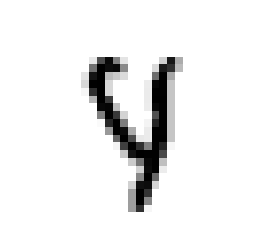

In [7]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt


some_digit = X[25000]

some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,
          interpolation = "nearest")

plt.axis("off")
plt.show()

In [8]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [9]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

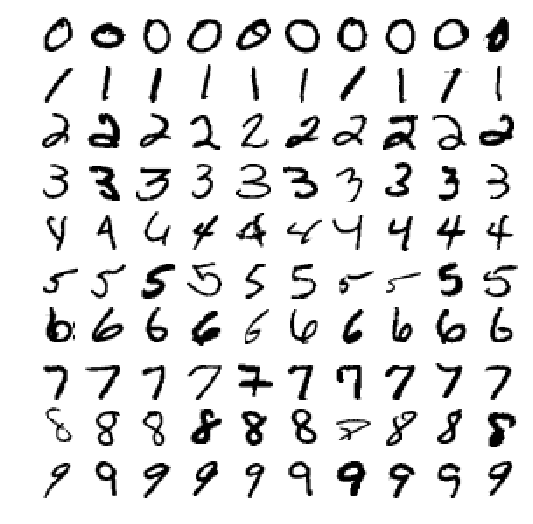

In [10]:
import numpy as np
plt.figure(figsize=(9,9))
example_images = np.r_[X[:12000:600], X[13000:30600:600], X[30600:60000:590]]
plot_digits(example_images, images_per_row=10)
plt.show()

In [11]:
y[25000]

4.0

Splitting the training and testing set

In [12]:
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

Now shuffle the training set, this will gurantee that all cross-validation folds will similar.

In [13]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train,y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a Binary Classifier

Now we are going to create a Binary Classifier. This will detect is our number is 4 or not

In [14]:
y_train_4 = (y_train==4)
y_test_4 = (y_test==4)

In [15]:
y_train_4

array([False,  True, False, ...,  True, False, False])

In [16]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_4)

/anaconda2/lib/python2.7/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [17]:
sgd_clf.predict([some_digit])

array([ True])

## Performance Measures

### Measuring Accuracy Using Cross-Validation 

In [18]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_4,cv=4,scoring = "accuracy")

array([0.97693487, 0.97746817, 0.98006534, 0.97413161])

It looks it is a great accuracy, but the classifier is just predicting it is 4 or not. There are only 90% of data is not 4. That means if we predict everything as not 4 then classifier is 90% accurate. So accuracy is not the best measure for the performance. So now we will cosntruct Confusion Matrix

### Confusion Matrix

The general idea is to count number of items instances class A are classified as class B

In [19]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_4,cv=4)
y_train_pred

array([False,  True, False, ..., False, False, False])

In [20]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_4,y_train_pred)

array([[53556,   602],
       [  769,  5073]])

True Negative : 53862

False Positive :296

False Negative : 1446

True Positive : 4396

### Precision and Recall 

$$precision = \frac{True Positive}{True Positive + False Positive}$$

$$recall = \frac{True Positive}{True Positive + False Negative}$$

In [21]:
from sklearn.metrics import precision_score,recall_score

precision_score(y_train_4,y_train_pred)

0.893920704845815

In [22]:
recall_score(y_train_4,y_train_pred)

0.8683669976035604

This classifier image represents a 4, it is correct 93%

It detects only 75% of the 4s

#### F1 score :

Lets calculate F1 score for the classifier. F1 score is nothing but harmonic mean of Precision and recall.


$$F_{1} = \frac{2}{\frac{1}{precision} + \frac{1}{recall}}$$

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_4,y_train_pred)

0.8809585829643136

### Precision and Recall tradeoff

In some context we need high precision and in some context we need high recall or sensitivity. So we need to make a tradeoff between Precision and Recall.

For each instance, Classifier computes a score based on a _decision function_. 

If score > threshold then it is assign positive class.<br>
If score < threshold then it is assign negative class.<br>

So if we increase threshold precision will be more, if we decrease threshold recall will be more.

Using scikit learn we can not set the threshold directly, but it does give access to the decision scores that it uses to make predictions. 

Instead of _predict()_ method we will use _decision_function()_.


In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([98426.96227447])

Now we will use the different threshold to see how it will work

In [25]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

In [26]:
threshold = 25000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True])

We can clearly see that raising the threshold decreases recall. The image actually shows 4 but the classifier detects it when the threshold is 0, but misses when threshold is 25000. 

So how can we decide which threshold to use ?

First we will find the decision scores for all the values. by using _precision_recall_curve()_ we can compute precision and recall for all possible thresholds. We can plot the values using _matplotlib_

In [27]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_4, cv =3, method = "decision_function")

In [28]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_4, y_scores)

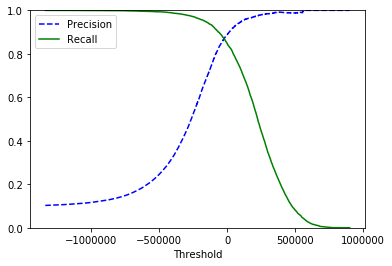

In [29]:
def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label = "Precision")
    plt.plot(thresholds,recalls[:-1],"g-",label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc = "upper left")
    plt.ylim([0,1])

plot_precision_recall_vs_threshold(precisions,recalls, thresholds)
plt.show()

By checking the baove plot we can decide the threshold value. Another way is to plot precision against recall.

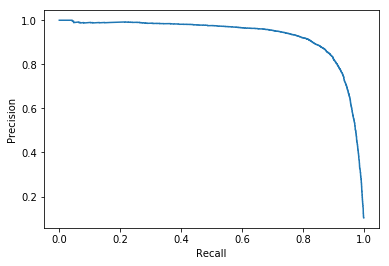

In [30]:
plt.plot(recalls,precisions)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()

Once we decided the threshold value, we can make the prediciton without calling _predict_ method. 

In [31]:
y_train_pred_90 = (y_scores > 50000)

In [32]:
precision_score(y_train_4,y_train_pred_90)

0.9223590150913423

In [33]:
recall_score(y_train_4, y_train_pred_90)

0.7951044162957891

### Receiver Operating Characteristic (ROC Curve)


ROC curve will plot between _True positive rate_ and _False positive rate_. 


In [34]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_4,y_scores)

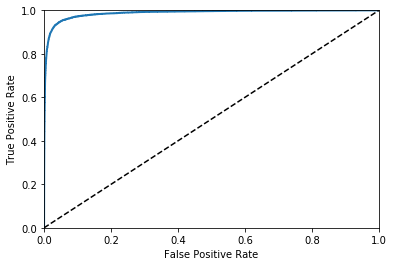

In [35]:
def plot_roc_curve(fpr,tpr, label = None):
    plt.plot(fpr, tpr, linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

ROC area under the curve is a way to compare classifiers. It is abbreviated as _ROC AUC_

for perfect classifiers : ROC AUC has value 1
for purely  random classifiers : ROC AUC has value 0.5

In [36]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_4,y_scores)

0.9869944355819235

### Random Classifier 

Random Classifier class does not have a decision_function() method. Instead it has predict_proba() method. 

In [38]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state = 42)
y_proba_forest = cross_val_predict(forest_clf,X_train, y_train_4, cv=3, method = "predict_proba")

In [39]:
y_scores_forest = y_proba_forest[:,1] # score = proba of positive class

fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_4,y_scores_forest)


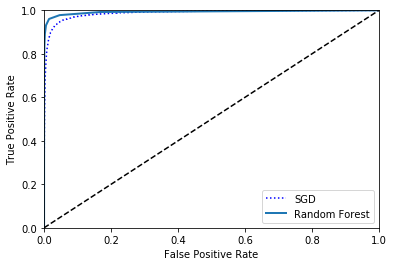

In [40]:
plt.plot(fpr,tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest,tpr_forest, "Random Forest")
plt.legend(loc = "lower right")
plt.show()

In [41]:
roc_auc_score(y_train_4,y_scores_forest)

0.99285071085263

### Multiclass Classification

It can distinguish more than 2 classes and also called as multinomial classifiers.

Multiclass classifiers : RandomForest and navie bayes
Binary classifiers : Support vector machines or Linear classifiers

#### Strategies to perform multiclass classification using multiple binary classifiers

- One vs all (OVA)
- One vs One (OvO)
- Support vector machines

In [42]:
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])

array([4.])

Here we are using the original target classes from 0 to 9. Under the hood, Scikit learn actually trained 10 binary classifiers, got their decision scores and selected the class with the highest score.

If we use _decision_function()_ method returns one score per instance. So now it will return 10 scores per class.

In [43]:
some_digit_scores = sgd_clf.decision_function([some_digit])

some_digit_scores



array([[-600346.87030051, -516406.5379221 , -237690.61490392,
        -115986.36895108,   98426.96227447, -119096.95058353,
        -446018.24278993,  -44441.95815545, -180235.90469556,
        -256463.79559265]])

In [44]:
np.argmax(some_digit_scores)

4

In [45]:
sgd_clf.classes_  
## when a classifier is trained, it stores the list of target classes_
## in it classes_ attribute, ordered by values

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [46]:
sgd_clf.classes_[4]

4.0

We can force Scikit learn to use one-versus-one or one-versus-all, we can use OneVsOneClassifier or OneVsRestClassifier classes.



In [47]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])

array([4.])

In [48]:
len(ovo_clf.estimators_)

45

In [49]:
forest_clf.fit(X_train,y_train)

forest_clf.predict([some_digit])

array([4.])

In [50]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0. , 0.9, 0. , 0.1, 0. , 0. , 0. ]])

### Evaluating the Classes

We can evaluate these classifiers using cross_val_score() function:

In [51]:
cross_val_score(sgd_clf,X_train,y_train, cv=3, scoring = "accuracy")


array([0.85017996, 0.85679284, 0.87863179])

In [52]:
cross_val_score(forest_clf,X_train,y_train, cv=3 , scoring = "accuracy")

array([0.93981204, 0.94094705, 0.93884083])

In [53]:
## to imporve the performance we are using scaling 

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv =3, scoring = "accuracy")

array([0.90846831, 0.90989549, 0.9113367 ])

### Error Analysis

First calculate the confusion matrix. We need to make predicitons using  cross_val_predict() then call the confusion_matrix() function.

In [54]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5731,    4,   19,    8,   12,   50,   47,   11,   38,    3],
       [   1, 6496,   42,   29,    6,   41,    6,   13,   94,   14],
       [  55,   40, 5324,  114,   87,   20,   95,   52,  158,   13],
       [  59,   42,  133, 5358,    1,  224,   35,   55,  135,   89],
       [  18,   25,   41,    9, 5394,    9,   48,   27,   78,  193],
       [  70,   40,   32,  185,   77, 4590,  111,   32,  186,   98],
       [  29,   23,   54,    2,   50,   93, 5609,    6,   51,    1],
       [  25,   21,   72,   28,   62,    8,    6, 5815,   14,  214],
       [  49,  167,   67,  161,   17,  148,   55,   29, 5032,  126],
       [  44,   34,   26,   91,  174,   31,    2,  220,   82, 5245]])

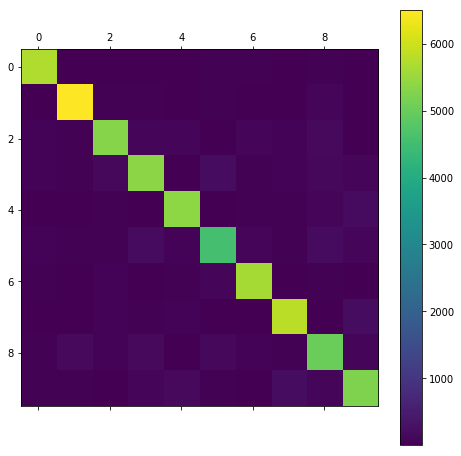

In [55]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

plot_confusion_matrix(conf_mx)

In [56]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

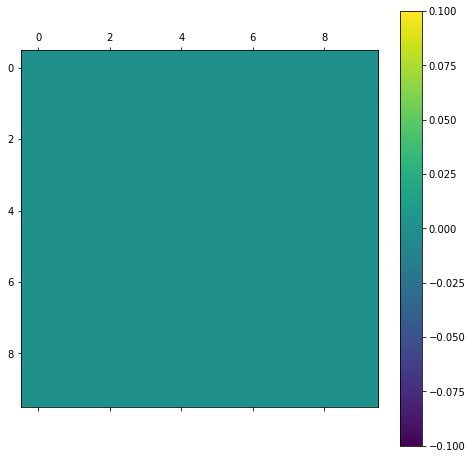

In [57]:
np.fill_diagonal(norm_conf_mx, 0)
plot_confusion_matrix(norm_conf_mx)

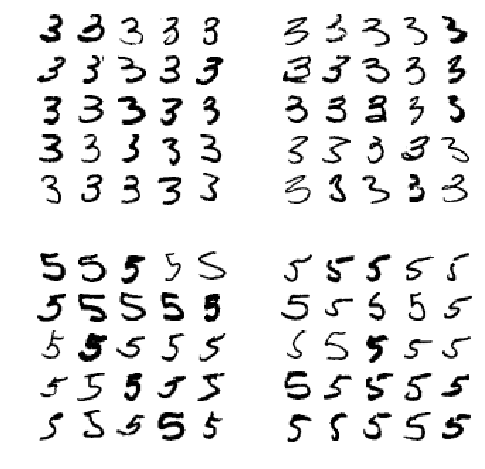

In [58]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")


cl_a, cl_b = 3,5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]

plt.figure(figsize=(8,8))


plt.subplot(221); plot_digits(X_aa[:25], images_per_row = 5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row = 5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row = 5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row = 5)
plt.show()

### Multilabel Classification

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 0)

y_multilabel = np.c_[y_train_large,y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [63]:
knn_clf.predict([some_digit])

array([[False,  True]])

In [64]:
y_multilabel

array([[False, False],
       [False,  True],
       [ True, False],
       ...,
       [False,  True],
       [False, False],
       [ True, False]])

In [ ]:
y_train_knn_pred = cross_val_score(knn_clf,X_train, y_train, cv=3)
f1_score(y_train,y_train_knn_pred, average = "macro")

### Multioutput Classification

In [ ]:
noise = np.random.randint(0,100,(len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0,100,(len(X_train), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test